In [96]:
!pip install kaggle


In [97]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [98]:
import json
token = {"username":"pranshulgoyal","key":"4b6c314aafb507243d2d5305817487ee"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [99]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [100]:
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

- path is now set to: {/content}


In [101]:
!kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [102]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [117]:
train_data  = pd.read_csv("/content/{/content}/competitions/titanic/train.csv")
test_data  = pd.read_csv("/content/{/content}/competitions/titanic/test.csv")

In [118]:
train_data = train_data.drop(['PassengerId','Name','Ticket','Embarked','Cabin'],axis=1)
test_data = test_data.drop(['PassengerId','Name','Ticket','Embarked','Cabin'],axis = 1)


In [119]:
train_data["Male"] = train_data["Sex"]
train_data["Female"] = train_data["Sex"]

for i in range(0,train_data.shape[0]):
  if(train_data["Sex"][i] == "male"):
    train_data["Male"][i] = 1 
    train_data["Female"][i] = 0 
  else:
    train_data["Male"][i] = 0 
    train_data["Female"][i] = 1 
train_data = train_data.drop(columns=['Sex'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: Setti

In [120]:
ytrain = train_data["Survived"]

In [121]:
xtrain = train_data.drop(["Survived"],axis  =1)
xtrain = xtrain.to_numpy()
ytrain = ytrain.to_numpy()
xtrain = xtrain.astype('float64')
ytrain = ytrain.astype('float64')
xtrain1 = xtrain
xtrain[np.isnan(xtrain1).any(axis=1)] = 0
assert not np.any(np.isnan(xtrain))


In [122]:
xtraina = xtrain[:700]
xtrainb = xtrain[700:]
ytraina = ytrain[:700]
ytrainb = ytrain[700:]
print(xtrainb.shape)

(191, 7)


In [123]:
def create_model(learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units= 5 ,input_shape=(7,),activation="relu"))
  model.add(tf.keras.layers.Dense(units=7,activation="relu"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(units=7,activation="relu"))
  model.add(tf.keras.layers.Dense(units=7,activation="relu"))
  model.add(tf.keras.layers.Dense(units=7,activation="relu"))
  model.add(tf.keras.layers.Dense(units=7,activation="relu"))
  model.add(tf.keras.layers.Dense(units=7,activation="relu"))
  model.add(tf.keras.layers.Dense(units=5,activation="relu"))
  model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
                loss="mean_squared_error",
                metrics=["accuracy"])

  return model  


In [124]:
def train_model(model,epochs,batch_size):
    history = model.fit(x = xtrain,y = ytrain,batch_size = batch_size,epochs=epochs, shuffle=True,validation_split = 0.2)
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["accuracy"]
    return epochs, rmse  

def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


In [128]:
learning_rate = 0.0009
epochs = 200
batch_size = 32

my_model = create_model(learning_rate)
epochs, rmse = train_model(my_model,epochs,batch_size)


Epoch 1/200
23/23 [==============================] - 0s 8ms/step - loss: 0.2442 - accuracy: 0.6096 - val_loss: 0.2479 - val_accuracy: 0.6425
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.6096 - val_loss: 0.2388 - val_accuracy: 0.6425
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.6096 - val_loss: 0.2311 - val_accuracy: 0.6425
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.6096 - val_loss: 0.2232 - val_accuracy: 0.6425
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.6096 - val_loss: 0.2197 - val_accuracy: 0.6425
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.6096 - val_loss: 0.2129 - val_accuracy: 0.6425
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.6096 - val_loss: 0.2096 - val_accuracy: 0.6425
Epoch 8/200
2

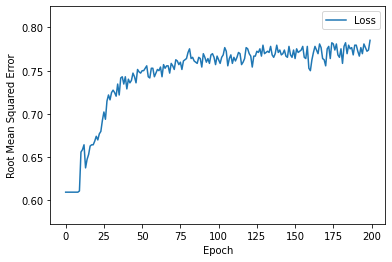

In [129]:
plot_the_loss_curve(epochs,rmse)

In [130]:
test_data["Male"] = test_data["Sex"]
test_data["Female"] = test_data["Sex"]

for i in range(0,test_data.shape[0]):
  if(test_data["Sex"][i] == "male"):
    test_data["Male"][i] = 1 
    test_data["Female"][i] = 0 
  else:
    test_data["Male"][i] = 0 
    test_data["Female"][i] = 1 
test_data = test_data.drop(columns=['Sex'])
xtest = test_data.to_numpy()
xtest = xtest.astype('float64')
xtest1 = xtest
xtest[np.isnan(xtest1).any(axis=1)] = 0
assert not np.any(np.isnan(xtest))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: Setti

In [131]:
predict = my_model.predict(xtest)

In [133]:
for i in range(0,predict.shape[0]):
  if predict[i] > 0.6:
    predict[i] = 1
  else:
    predict[i] = 0


In [134]:
predict = predict.astype('int32')

In [135]:
predict = pd.DataFrame(predict,columns=["Survived"])

In [136]:
Test_data  = pd.read_csv("/content/{/content}/competitions/titanic/test.csv")

In [137]:
final = pd.DataFrame(Test_data["PassengerId"],columns=["PassengerId"])

In [138]:
final["Survived"] = predict["Survived"]

In [139]:
final.head

<bound method NDFrame.head of      PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]>

In [140]:
final.to_csv (r'submission.csv', index = False, header=True)